# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [14]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print ("Boston Housing dataset loaded successfully")
#Should to print pandas data frame ? but can't execute...

Boston Housing dataset loaded successfully


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [15]:

# Number of houses in the dataset
total_houses = housing_features.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print ("Boston Housing dataset statistics (in $1000's):\n")
print ("Total number of houses:", total_houses)
print ("Total number of features:", total_features)
print ("Minimum house price:", minimum_price)
print ("Maximum house price:", maximum_price)
print ("Mean house price: {0:.3f}".format(mean_price))
print ("Median house price:", median_price)
print ("Standard deviation of house price: {0:.3f}".format(std_dev))

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


In [16]:
import pandas as pd

chosen_features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
features = city_data.feature_names.tolist()
for feature in chosen_features:
    index = features.index(feature)
    print ("CLIENT FEATURES: ",CLIENT_FEATURES[0][index])
    
frame_housing_prices = pd.DataFrame(housing_prices)
frame_housing_features = pd.DataFrame(housing_features)
frame_housing_features.columns = chosen_features
frame_housing_features.head()

CLIENT FEATURES:  11.95
CLIENT FEATURES:  0.0
CLIENT FEATURES:  18.1
CLIENT FEATURES:  0
CLIENT FEATURES:  0.659
CLIENT FEATURES:  5.609
CLIENT FEATURES:  90.0
CLIENT FEATURES:  1.385
CLIENT FEATURES:  24
CLIENT FEATURES:  680.0
CLIENT FEATURES:  20.2
CLIENT FEATURES:  332.09
CLIENT FEATURES:  12.13


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer:
The way I solve this question is mainly by intuition. Before see the significant attribute information, I'm trying to think what would be the three best attribute features I shall pick. 

1. I will say the <b>CRIM</b> per capita rate by town is important feature to consider. Most people they want to be save at home. This feature we can tell by looking at the Client Feature shows 11.95


2. Second feature would be <b>RAD</b> which the index of accesibility to radial highways. When I was trying to think intuitively, I found that the <b>PTRATIO</b> it can be also in the second option. This is also part of the consideration with the school nearby, however <b>RAD</b> won in this case because I was thinking single family and non single family around the area. The attribue information for that is not populated. Accesbility to the highway is one consideration when it comes buying a home.


3. Third feature, I would say <b>LSTAT</b> which the percentage lower status of the population. Intuitively we can tell that the <b>LSTAT</b> is related with <b>CRIM</b> rate.


## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [17]:
print ("Client Features: ",CLIENT_FEATURES)

Client Features:  [[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: CRIM is 11.95 , RAD is 24 and LSTAT is 12.13**

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [18]:
# Put any import statements you need for this code block here
from sklearn import cross_validation as crossval

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = crossval.train_test_split(X, y, test_size=0.30, random_state=101)
    
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print ("Successfully shuffled and split the data!")
except:
    print ("Something went wrong with shuffling and splitting the data.")



Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **

Because we want to know how we are going to measure our model performance for the prediction (in this case prediction is the unknown data/variable). I reviewed the Cross Validation and Training matrial and tried to think what the best way to train this. A bit google search and quora research, I came into the conslusion that split the data into training is good when we want to test our model with unknown data. Now the problem if we have limited data or the opposite way for testing, we can get the prediction becomes invalid or out of performace. 

On the top of the code, remember that we also did shuffle split. This means we are trying test with our algorithm within classification.

In sum, we want to get a perfect model with high performance, how we do this ? One of way is split the data.

Source: https://www.quora.com/Should-I-split-my-data-to-train-test-split-or-train-validation-test-subset

http://robjhyndman.com/hyndsight/crossvalidation/

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [19]:
# Put any import statements you need for this code block here
#from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    #error = metrics.mean_absolute_error(y_true, y_predict)
    # acc = accuracy_score (y_true, y_predict,normalize=True, sample_weight=None)
    error = mean_squared_error(y_true, y_predict)
    # meanAbsErr = mean_absolute_error (y_true, y_predict)
    return error

# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print ("Successfully performed a metric calculation!",total_error)
except:
    print ("Something went wrong with performing a metric calculation.")

Successfully performed a metric calculation! 0.0


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer:** 

MSE and MAE would be the best two predictors. These two performance metrics show that succesfully performed a metric calculation. I tried to run like Accuracy, Precision and Recall and Look F1 Score. Those parameters are related to clasification task. We need something to calculate the absolute difference to determine the best predictors. We can conclude this more applicable to check evidence of outliers in the data frame

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [20]:
# Put any import statements you need for this code block
from sklearn import metrics
from sklearn import grid_search

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = metrics.make_scorer(performance_metric, greater_is_better=False)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor,parameters,scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print ("Successfully fit a model!")
except:
    print ("Something went wrong with fitting a model.")

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

It is an exhaustive search and it is a method which invloves setting up a suitable grid in the design space and evaluate all the function at all the grid points. The goal is to find the grip point which has lowest or higher function value https://www.youtube.com/watch?v=8JfTd06R9uw. Now, I'm thinking how to describe this in a better real world situation. Perhaps, sorting algorithm, you want to sort some points, think about this you want to cheat minesweeper games. To cheat the game you also can use Djikstra or typical heuristics algorithm. What do you need to find? Indeed, you might need to find and have a lists of all possible values of each parameters that passed the algorithm. It is applicable and really helpful when you want to perform search and test. Why do we need to test ? Because we need to find the best combination (Almost rhetorical question number 3).

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*


In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png")

**Answer: **

It is a model evaluation method to validate a model. * https://www.cs.cmu.edu/~schneide/tut5/node42.html

We would do cross validation when perform grid search in order to eliminate overfitting. Reviewed again the video about model training and how to tune the parameters compare to the data set. The goal of cross validation is looking for data that should be succesfully fit into a model.

*Justification: Reviewer asked to explain how cross valdation helps with the grid search. Reviewer displayed a k-fold diagram *

The review itself has answered the question, which Cross Validation (CV) is useful because it maximize both the training set and testing data. This is the goal of CV. The question is more asking details in **"help"** . The K-fold will perform multiple sub set tests on training and testing data from the dataset to validate the data. Validate here means to look for the best accuracies within the rounds. By limiting the grid search in a single dataset, it would prevent the overfitting to happen.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [22]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print ("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [28]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print ("Creating a model complexity graph. . . ")

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(10, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


C:\Users\J52110\Pyhton\Anaconda\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


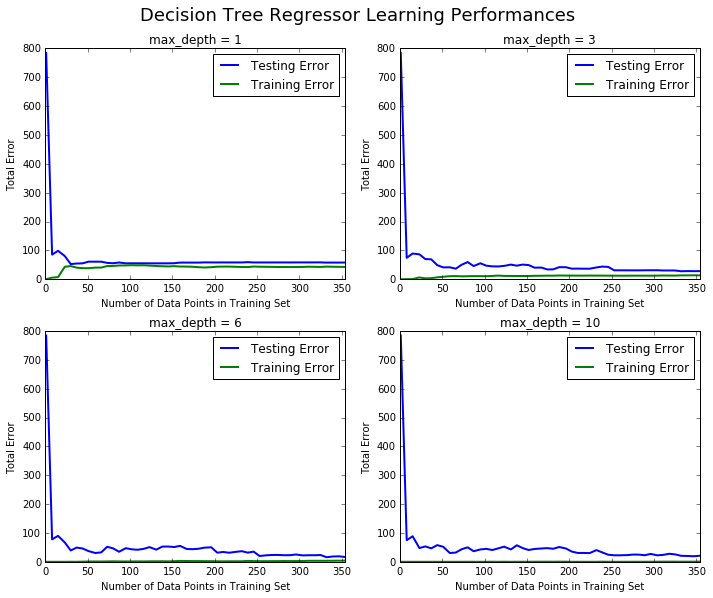

In [29]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **

Max depth =10. From the graph we can conclude that the training error increases slighty. On the other side, the testing error decreases toward the increase of training error. Similar to max depth 6 but it has higher training error. Therefore, compared between 10 and 6. I will choose max depth 10.

*Reviewer suggested justification* 

Okay, so maybe I was unclear by saying testing error decreseas with the increase of training error. What I was trying to say that as the number of points in the training set increases then it would give two effects to the training error increase and testing error decreases.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

By analyzing the graph, we may notice that
Max Depth 1 is high bias. It means there is a higher testing error and training error. We can say after the training of datasets the model will become high bias. The model doesn't pay much attention to the data.

Meanwhile, 

Max Depth 10 is high variance. There is an error on testing data. Total error of 20 for testing and close to 0 for training. It means that the training data is overfitted. Therefore, we can say there is a low error on training but high error on testing.

Creating a model complexity graph. . . 


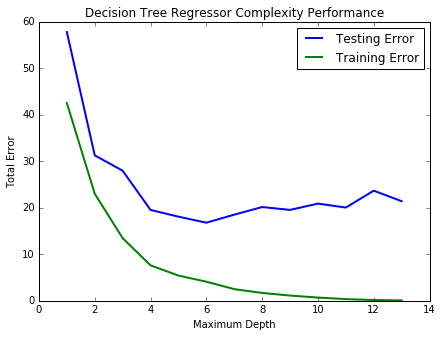

In [52]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **

The best max depth results in order to generalizes the data set is max depth 4. I'm kind of cheating here because I ran the Question 10 first before answer this. The result is max_depth param of 4. However, if we want to examine the graph, sure we can. From the graph,we can compare further (continue the idea from Q8). We are looking less bias and less variance. By looking at the graph it can be max depth 4 or 6. I can say the distance between testing and training error on max depth 6 is higher than max depth 4. The model might be overfit to improve the training performance in max depth 4.

*Reviewer mentioned to pick one and only one best guess opt model* **My answer would be model 4**

http://scott.fortmann-roe.com/docs/BiasVariance.html

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [25]:
print ("Final model has an optimal max_depth parameter of", reg.get_params()['max_depth'])

Final model has an optimal max_depth parameter of 4


**Answer: **

It looks like my intuition cross checked with the answer the optimal max depth params is 4.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [61]:
sale_price = reg.predict(CLIENT_FEATURES)
print ("Predicted value of client's home: {0:.3f}".format(sale_price[0]))

Predicted value of client's home: 21.630


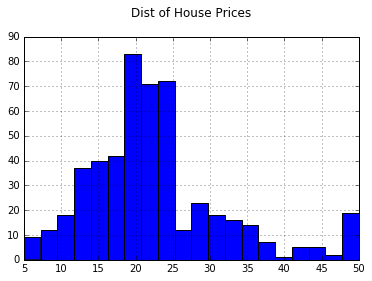

In [66]:
import pandas as pd

hist_test= pd.DataFrame(list(y_test)+list(y_train)).hist(bins = 20)
hist_test[0][0].set_title("Dist of House Prices\n");



**Answer: **

The best selling price is 21.630, roughly around 21,000. Compared to the mean and median prices which are Mean house price: 22.533 and Median house price: 21.2, this result is pretty much close. We can see from the graph that the range can be varies, depending on the client interest, it can be from 20-25k morelikely. Obviously, the client in this case is the seller and the buyer would likely want to see room for negotiation.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

It is a good start but I won't use this model to predict the selling price of future clients home in Greater Boston Area. Here are my reasons:
1. The data needs to be up to date. I would say the model will more likely solid when it refers to the more up to date data on market right now. However, there are always a high chance we would never be satisfied with the model itself. Why ? My thought directs me to the nature of random sampling or in this course mentioned about curse of dimensionality. Remember the exponential data, the greater amount of data can cause an effect to starvation. Never enough. One way to solve is using fewer more accurate data. Perhaps, we can come with the less variable we are interested, for an example CRM compared to Annual Income. 


2. Reduce the dimension, as mentioned in point number 1. We perhaps can take method of simple linear regression, perform ANOVA/ ANOCA and look for the principal component analysis.Why we want to do this ? Because we are only interested in linearity of the model and we only want to see correlation between the variables linearly. Test the model by looking at the R square and F ratio is part of the step.

This model can be a really good start with some enhancements. The observation can be broader into many variables such as, annual income, number of households, and price of higher value house. 